# Test model

## Import libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc
from torch import nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision import models
from utilities import ChestXrayHDF5

## Select dataset and best models

In [2]:
dataset = ChestXrayHDF5(f'/home/aisinai/work/HDF5_datasets/COVID19_binary_test_1024.hdf5')
model_scores = torch.load("/home/aisinai/work/covid19/densenet121/20200507/score3/best_densenet_145.pt")
model_admits = torch.load("/home/aisinai/work/covid19/densenet121/20200507/admit3/best_densenet_129.pt")

## Compute predictions

In [3]:
scores = []
admits = []
intubs = []
deaths = []
preds_scores = []
preds_admits = []

for i, (img, score, admit, intub, death) in enumerate(dataset):
    sample_img = torch.rand((1,3,1024,1024))
    sample_img[0,:] = img
    sample_img = sample_img.cuda()
    scores.append(score.numpy())
    admits.append(admit.numpy())
    intubs.append(intub.numpy())
    deaths.append(death.numpy())
    preds_scores.append(model_scores(sample_img).detach().cpu().numpy()[0])
    preds_admits.append(model_admits(sample_img).detach().cpu().numpy()[0])
    if (i + 1) == len(dataset):
        break

## Compue AUROC and generate graphs

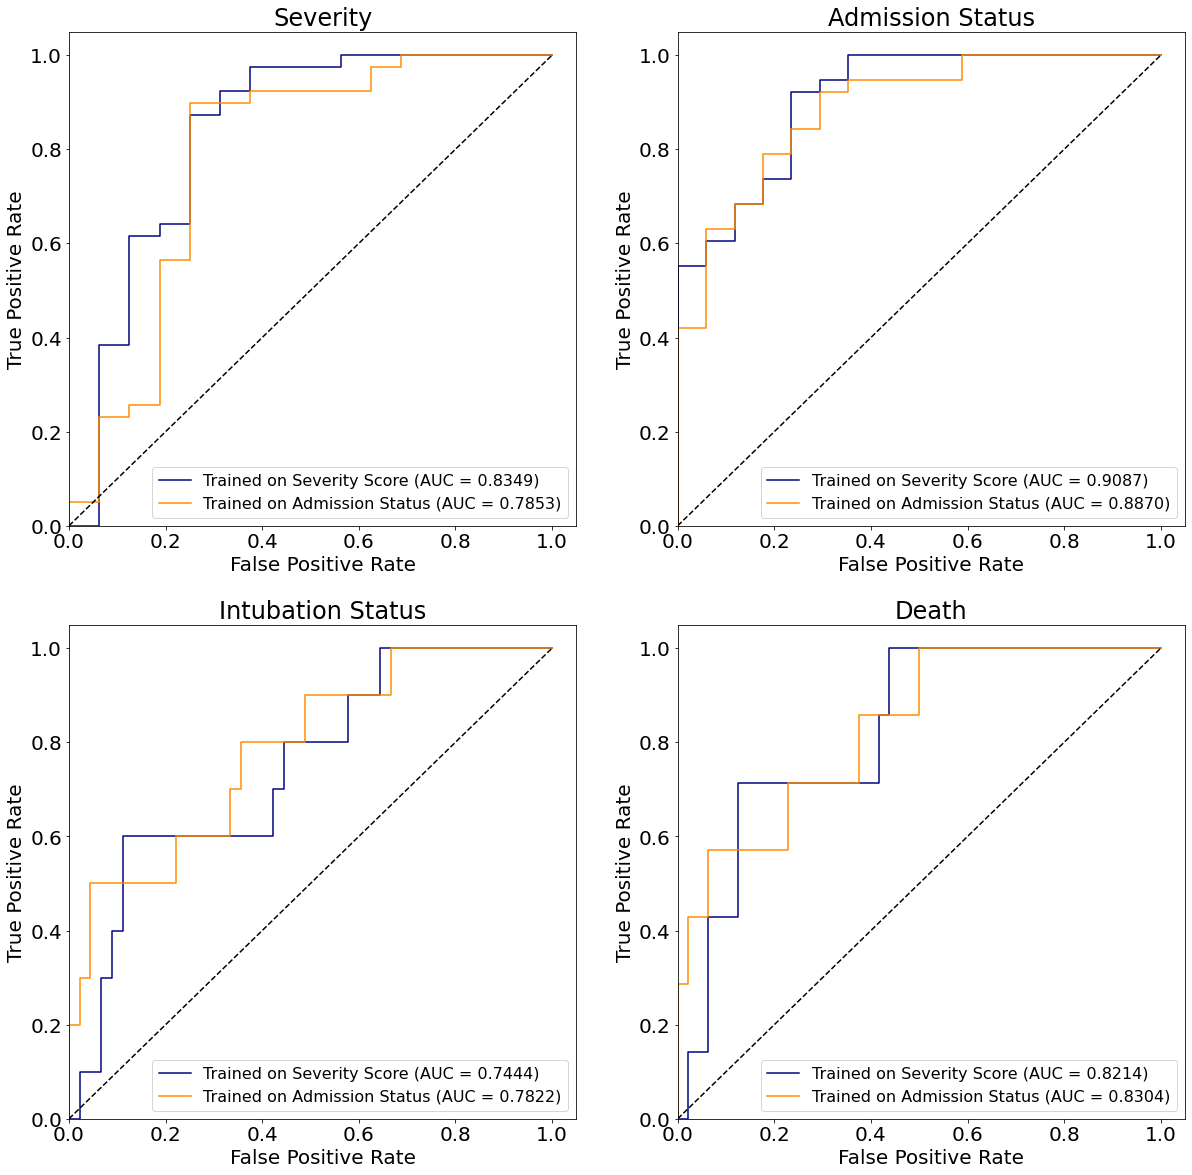

In [4]:
font = {'size': 20}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))

fontsize = 16
ymin = 0
ax1 = fig.add_subplot(221)

fpr_scores, tpr_scores, _ = roc_curve(scores, preds_scores)
roc_auc_scores = auc(fpr_scores, tpr_scores)
fpr_admits, tpr_admits, _ = roc_curve(scores, preds_admits)
roc_auc_admits = auc(fpr_admits, tpr_admits)

ax1.plot(fpr_scores, tpr_scores, color='navy',
         label=f'Trained on Severity Score (AUC = {roc_auc_scores:.4f})')
ax1.plot(fpr_admits, tpr_admits, color='darkorange',
         label=f'Trained on Admission Status (AUC = {roc_auc_admits:.4f})')
ax1.plot([0, 1], [0, 1], color='black', linestyle='--')
ax1.axis(xmin=0, xmax=1.05, ymin=0, ymax=1.05)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Severity')
ax1.legend(loc="lower right", fontsize = 16)

ax2 = fig.add_subplot(222)

fpr_scores, tpr_scores, _ = roc_curve(admits, preds_scores)
roc_auc_scores = auc(fpr_scores, tpr_scores)
fpr_admits, tpr_admits, _ = roc_curve(admits, preds_admits)
roc_auc_admits = auc(fpr_admits, tpr_admits)

ax2.plot(fpr_scores, tpr_scores, color='navy',
         label=f'Trained on Severity Score (AUC = {roc_auc_scores:.4f})')
ax2.plot(fpr_admits, tpr_admits, color='darkorange',
         label=f'Trained on Admission Status (AUC = {roc_auc_admits:.4f})')
ax2.plot([0, 1], [0, 1], color='black', linestyle='--')
ax2.axis(xmin=0, xmax=1.05, ymin=0, ymax=1.05)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Admission Status')
ax2.legend(loc="lower right", fontsize = 16)

ax3 = fig.add_subplot(223)

fpr_scores, tpr_scores, _ = roc_curve(intubs, preds_scores)
roc_auc_scores = auc(fpr_scores, tpr_scores)
fpr_admits, tpr_admits, _ = roc_curve(intubs, preds_admits)
roc_auc_admits = auc(fpr_admits, tpr_admits)

ax3.plot(fpr_scores, tpr_scores, color='navy',
         label=f'Trained on Severity Score (AUC = {roc_auc_scores:.4f})')
ax3.plot(fpr_admits, tpr_admits, color='darkorange',
         label=f'Trained on Admission Status (AUC = {roc_auc_admits:.4f})')
ax3.plot([0, 1], [0, 1], color='black', linestyle='--')
ax3.axis(xmin=0, xmax=1.05, ymin=0, ymax=1.05)
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Intubation Status')
ax3.legend(loc="lower right", fontsize = 16)

ax4 = fig.add_subplot(224)

fpr_scores, tpr_scores, _ = roc_curve(deaths, preds_scores)
roc_auc_scores = auc(fpr_scores, tpr_scores)
fpr_admits, tpr_admits, _ = roc_curve(deaths, preds_admits)
roc_auc_admits = auc(fpr_admits, tpr_admits)

ax4.plot(fpr_scores, tpr_scores, color='navy',
         label=f'Trained on Severity Score (AUC = {roc_auc_scores:.4f})')
ax4.plot(fpr_admits, tpr_admits, color='darkorange',
         label=f'Trained on Admission Status (AUC = {roc_auc_admits:.4f})')
ax4.plot([0, 1], [0, 1], color='black', linestyle='--')
ax4.axis(xmin=0, xmax=1.05, ymin=0, ymax=1.05)
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Death')
ax4.legend(loc="lower right", fontsize = 16)
fig.show()